<a href="https://colab.research.google.com/github/daryllman/loan-prediction/blob/master/LoanPredictionEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction - Exploratory Data Analysis (EDA)
## Information:

## Import dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [ ]:
# Mount your google collab drive
# Skip if using local system
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Skip if using local system
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/loan-prediction')

['LoanPredictionEDA.ipynb', 'test_lAUu6dG.csv', 'train_ctrUa4K.csv']

In [ ]:
# Load CSV - train & test files

#import os
#folder_path = os.getcwd()
folder_path = '/content/drive/My Drive/Colab Notebooks/loan-prediction/'
train = pd.read_csv(folder_path+'train_ctrUa4K.csv')
test = pd.read_csv(folder_path+'test_lAUu6dG.csv')

## Brief Look at datasets



In [ ]:
# Train data
print("Train shape:",train.shape)
train.head()

Train shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Test data
print("Test shape:",test.shape)
test.head()

Test shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Quick check for duplication
print("Duplicated records in training set:" , train.duplicated().sum())

Duplicated records in training set: 0


From here on, since we are only doing EDA, we shall do EDA with training data 

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Observations         
**Size of dataset:** (614,13)            
**Data types:**        
*   Object - Loan_ID, Gender, Married, Dependents, Education, Self_Employed,Property_Area, Loan_status  
*   Integer - ApplicantIncome
*   Float - CoapplicantIncome, Loan_Amount_Term, Credit_History 




### Grouping the features
Let us classify columns as Categorical, Ordinal and Continuous (numerical).    
Categorical variables are variables with 2 distinct groups, Ordinal Variables are variables that can be divided into a few groups (with some element of ordering), Continuous variables are variables that can take any value in a given range.
*   **Categorical** - Gender, Married, Education, Self_Employed, Loan_Status
*   **Ordinal** - Property_Area, Dependents
*   **Continuous** - ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History



## Univariate Analysis
Analysis of a single variable

### Categorical Variables

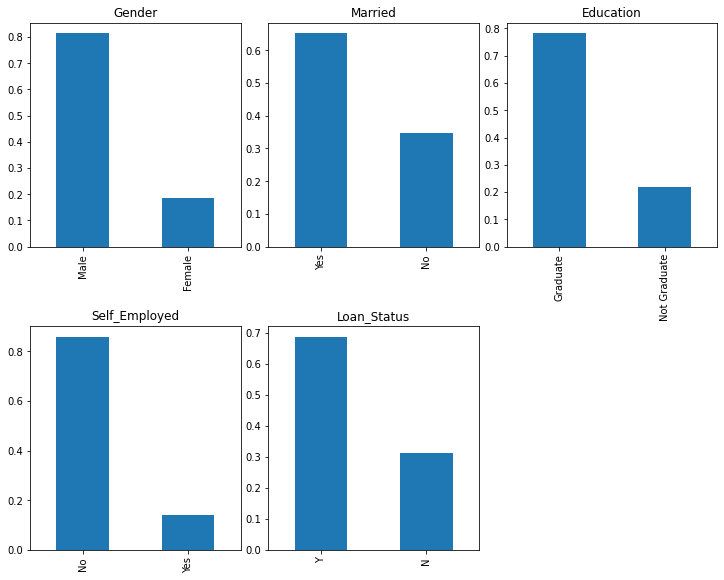

In [ ]:
plt.subplot(231)
train.Gender.value_counts(normalize=True).plot(kind = 'bar', title = "Gender",figsize=(10,8))
plt.tight_layout(pad=0.5)

plt.subplot(232)
train.Married.value_counts(normalize=True).plot(kind = 'bar', title = "Married")
plt.tight_layout(pad=0.5)

plt.subplot(233)
train.Education.value_counts(normalize=True).plot(kind = 'bar', title = "Education")
plt.tight_layout(pad=0.5)

plt.subplot(234)
train.Self_Employed.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)

plt.subplot(235)
train.Loan_Status.value_counts(normalize=True).plot(kind = 'bar',title = "Loan_Status")
plt.tight_layout(pad=0.5)

**Insights from analysis of Categorical Varaibles**
* 80% of loan applicants are males
* About 70% are married
* About 75% of the loan applicants are graduates
* Highest number of applicants are from Semiurban areas, followed by urban, and rural area
* About 85% loan applicants are self employed
* Loan has been approved for close to 70% of applicants.



### Ordinal Variables


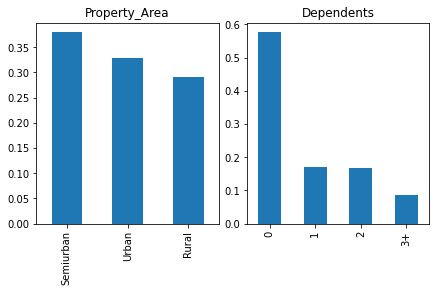

In [ ]:
plt.subplot(121)
train.Property_Area.value_counts(normalize=True).plot(kind = 'bar',title = "Property_Area")
plt.tight_layout(pad=0.5)
plt.subplot(122)
train.Dependents.value_counts(normalize = True).plot(kind='bar',title="Dependents")
plt.tight_layout(pad=0.5)

**Insights from analysis of Ordinal Variables**
* Close to 60% have 0 dependents
* Most are from Semi Urban areas, followed by Urban, then Rural

### Numerical Variables

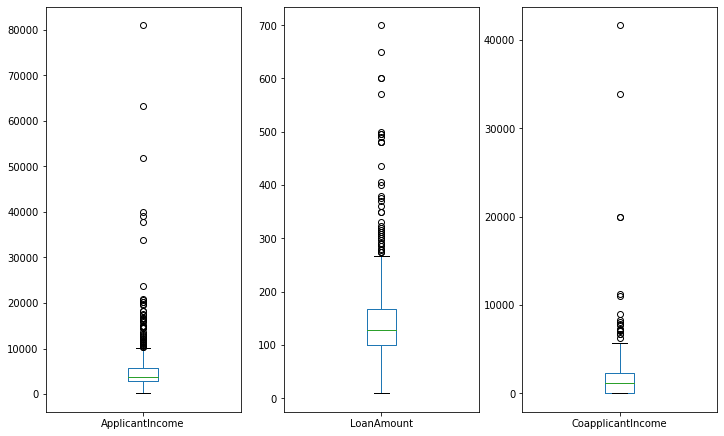

In [ ]:
plt.subplot(131)
Train['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
Train['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
Train['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

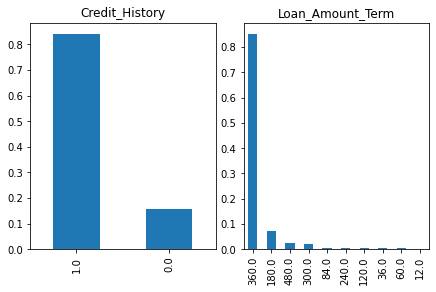

In [ ]:
plt.subplot(121)
train.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)

plt.subplot(122)
train.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

**Insights from analysis of Numerical Variables**
* Most (about 80%) have a credit history of 1
* Most (about 85%) of loans are 360 days
* ApplicantIncome is mostly betwee n 10 000 - 40 000 (with outliers)
* CoapplicantIncome is mostly between 5000 - 15 000
* Loan amount is mostly concentrated between 250 - 500

## Bivariate Analysis
Finding relationship between 2 variables      
For this, let us find the relationship between *target variable* "Loan_Status" and another *predictor variable*

### Pre-analysis Hypothesis
Let's make some reasonable hypothesis and see if our the data is within our expectations, and if there are any insightful points drawn from this.
* Applicants with higher income may have a higher chance of getting their loans approved
* Applicants with fewer number of dependents and higher coapplicantIncome may have a higher chance of getting loan approvals
* Applicants who are graduates, tend to earn more, and have higher loan approval rates
* Applicants who are married, may seem more responsible, and have higher loan approval chances
* Applicants who are not self-employed, may have a higher chances of loan approval as they tend to have constant source of income.
* Applicants with property in urban areas have a higher chance of loan approval
* Good credit history correlates with loan approval




### Analysis


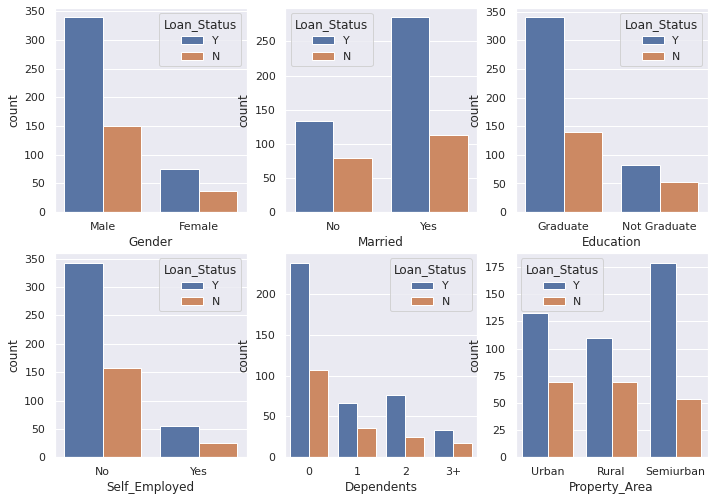

In [ ]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=train)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=train)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=train)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=train)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=train)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=train)

**Insights:**
* No significant difference between Male & Female approval rates
* Married applicants have a slightly higher chance of loan approval
* Graduates have a higher chance of loan approval than non-graduates
* No significant difference in loan appoval rates for self-employed & non self-employed applicants
* Applicants with properties in semi-urban areas have a significantly higher chance of loan approval

## Multivariate Analysis
Finding relationship amongst more than 2 variables         
Similarly, let us find the relationship between target variable "Loan_Status" and 2 other predictor variables

[ 12.          54.54545455  97.09090909 139.63636364 182.18181818
 224.72727273 267.27272727 309.81818182 352.36363636 394.90909091
 437.45454545 480.        ]


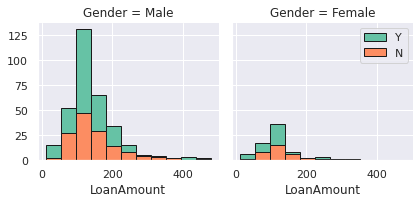

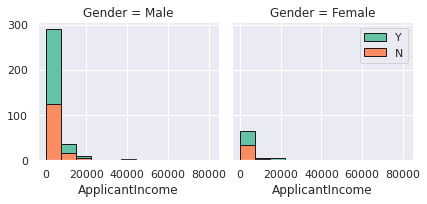

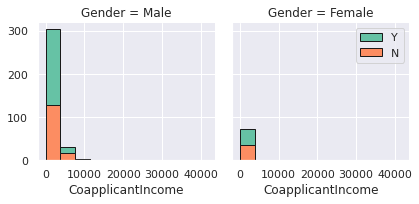

In [ ]:
# Comparison with Gender
bins = np.linspace(train.Loan_Amount_Term.min(), train.Loan_Amount_Term.max(),12) # 12 intervals
print(bins)
graph = sns.FacetGrid(train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

bins = np.linspace(train.ApplicantIncome.min(), train.ApplicantIncome.max(),12)
graph = sns.FacetGrid(train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

bins = np.linspace(train.CoapplicantIncome.min(), train.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(train, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

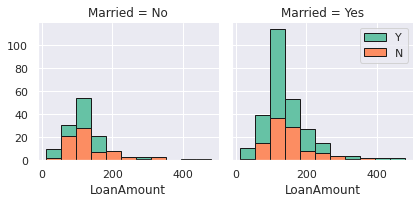

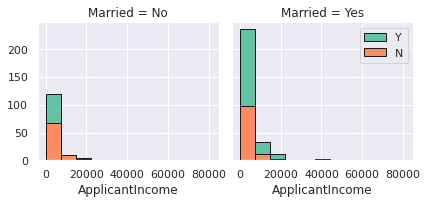

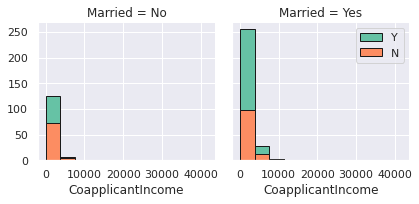

In [ ]:
# Comparison with 'Married' status
bins = np.linspace(train.Loan_Amount_Term.min(), train.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(train, col="Married", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")

graph.axes[-1].legend()
plt.show()

bins = np.linspace(train.ApplicantIncome.min(), train.ApplicantIncome.max(),12)
graph = sns.FacetGrid(train, col="Married", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()


bins = np.linspace(train.CoapplicantIncome.min(), train.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(train, col="Married", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")

graph.axes[-1].legend()
plt.show()

**Insights:**
* Females with income of more than 7000 has significantly higher chances of loan approval 
* Females take less loan than males, generally
* CoapplicantIncome for Females is significantly lower than Males

## Correlation between numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


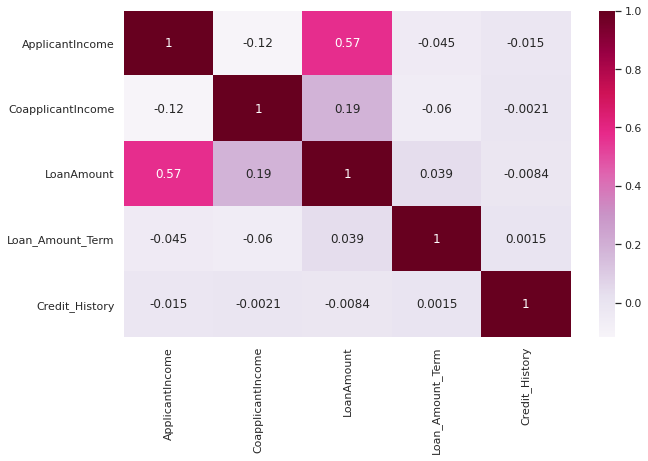

In [ ]:
# Using Heatmap
correlation_mat = train.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlation_mat, vmax=1,cmap="PuRd",annot=True)

correlation_mat

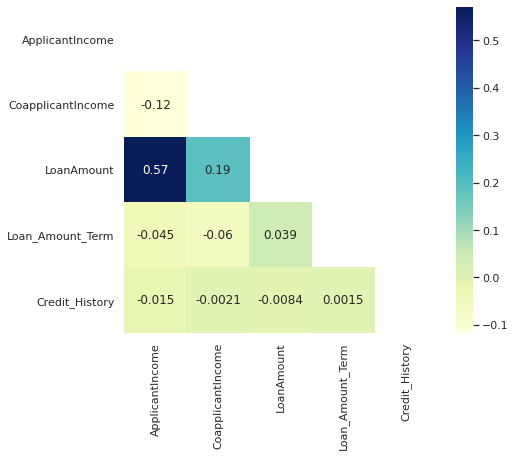

In [ ]:
# Delete repetitive elements of heat map (remove upper half)
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

**Insights from correlation:**
* There is strong positive correlation between ApplicantIncome & LoanAmount, CoapplicantIncome & LoanAmount

Credits: [Priyanka Meena](https:/towardsdatascience.com/an-introduction-to-exploratory-data-analysis-in-python-9a76f04628b8)
